# Project 2 - Data exploration
###  Comparing merge options
by: Alissa Stover, Sophia Skowronski, Ying Hua

This Jupyter notebook walks through some data exploration steps for data from a Kaggle competition. 
The data and the complete data dictionary are here: https://www.kaggle.com/c/ashrae-energy-prediction/data 

This notebook focuses on a subset of the data with meter reading from electric meters (one of four types in the data). The purpose of this notebook is to explore data quality issues for this subset, specifically within the timestamp variable. By the end of the notebook, we should have a decision as to whether to use the timezone adjusted data or the original. 

Dataframes with "tz" in the name have been timezone adjusted -- in the original data, timezones were not aligned. 

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Import Data
*train_etz_df* is the timezone adjusted data. 
*train_e_df* is the original data.

In [2]:
train_etz_df = pd.read_pickle('tz_aware_merged_data_weather_imputed.pkl')
train_e_df = pd.read_pickle('train_merge_orig_df.pkl')

## Data checks

### Do they look similar?

In [3]:
train_e_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,time_index,...,dst,timestamp_utc,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,timestamp
0,0,0,2016-01-01 00:00:00-05:00,220.046471,0,Education,7432,2008.0,8.0,0,...,0,2016-01-01 00:00:00+00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2015-12-31 19:00:00-05:00
1,1,0,2016-01-01 00:00:00-05:00,101.917963,0,Education,2720,2004.0,5.0,0,...,0,2016-01-01 00:00:00+00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2015-12-31 19:00:00-05:00
2,2,0,2016-01-01 00:00:00-05:00,5.634698,0,Education,5376,1991.0,4.0,0,...,0,2016-01-01 00:00:00+00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2015-12-31 19:00:00-05:00
3,3,0,2016-01-01 00:00:00-05:00,366.496399,0,Education,23685,2002.0,10.0,0,...,0,2016-01-01 00:00:00+00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2015-12-31 19:00:00-05:00
4,4,0,2016-01-01 00:00:00-05:00,1568.406545,0,Education,116607,1975.0,1.0,0,...,0,2016-01-01 00:00:00+00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2015-12-31 19:00:00-05:00


In [4]:
train_etz_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,time_index,...,precip_depth_1_hr,sea_level_pressure,timestamp_utc,wind_direction,wind_speed,timezone,country_code,location,dst,local_time
0,0,0,2016-01-01,220.046471,0,Education,7432,2008.0,8.0,0,...,0.0,NaN,2016-01-01 05:00:00,0.0,0.0,US/Eastern,US,"Orlando, FL",0.0,2016-01-01
1,1,0,2016-01-01,101.917963,0,Education,2720,2004.0,5.0,0,...,0.0,NaN,2016-01-01 05:00:00,0.0,0.0,US/Eastern,US,"Orlando, FL",0.0,2016-01-01
2,2,0,2016-01-01,5.634698,0,Education,5376,1991.0,4.0,0,...,0.0,NaN,2016-01-01 05:00:00,0.0,0.0,US/Eastern,US,"Orlando, FL",0.0,2016-01-01
3,3,0,2016-01-01,366.496399,0,Education,23685,2002.0,10.0,0,...,0.0,NaN,2016-01-01 05:00:00,0.0,0.0,US/Eastern,US,"Orlando, FL",0.0,2016-01-01
4,4,0,2016-01-01,1568.406545,0,Education,116607,1975.0,1.0,0,...,0.0,NaN,2016-01-01 05:00:00,0.0,0.0,US/Eastern,US,"Orlando, FL",0.0,2016-01-01


### Do they have similar univariate statistics?

In [5]:
train_etz_df.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,time_index,day_of_week,hour_of_day,...,std,outlier,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,dst
count,1.206231e+07,12062311.0,1.206231e+07,1.206231e+07,1.206231e+07,1.206231e+07,1.206231e+07,1.206231e+07,1.206231e+07,1.206231e+07,...,1.206231e+07,1.206231e+07,1.206231e+07,6.730604e+06,1.206231e+07,9.548008e+06,1.104321e+07,1.138266e+07,1.199427e+07,1.201757e+07
mean,7.066489e+02,0.0,1.861771e+02,6.749967e+00,9.271422e+04,1.965350e+03,4.015187e+00,4.420097e+03,3.007792e+00,1.150130e+01,...,6.544330e+01,3.017121e+02,1.598076e+01,2.283874e+00,8.319339e+00,8.028555e-01,1.016401e+03,1.763103e+02,3.559432e+00,6.469667e-01
std,4.152334e+02,0.0,4.009262e+02,4.946893e+00,1.121099e+05,2.976956e+01,3.286978e+00,2.531453e+03,1.997296e+00,6.922906e+00,...,1.663940e+02,6.221305e+02,1.041337e+01,2.553503e+00,9.844178e+00,7.725331e+00,7.035549e+00,1.128433e+02,2.318129e+00,4.779130e-01
min,0.000000e+00,0.0,-4.608884e+01,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.133948e-06,4.042451e-04,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.450000e+02,0.0,2.390000e+01,3.000000e+00,2.301200e+04,1.948000e+03,2.000000e+00,2.263000e+03,1.000000e+00,5.000000e+00,...,1.022940e+01,4.921902e+01,8.900000e+00,0.000000e+00,1.100000e+00,0.000000e+00,1.012100e+03,8.000000e+01,2.100000e+00,0.000000e+00
50%,6.980000e+02,0.0,7.102000e+01,5.000000e+00,5.781100e+04,1.968000e+03,3.000000e+00,4.433000e+03,3.000000e+00,1.200000e+01,...,2.558675e+01,1.301398e+02,1.670000e+01,2.000000e+00,9.400000e+00,0.000000e+00,1.016500e+03,1.800000e+02,3.100000e+00,1.000000e+00
75%,1.063000e+03,0.0,1.848960e+02,1.200000e+01,1.161210e+05,1.985000e+03,6.000000e+00,6.609000e+03,5.000000e+00,1.800000e+01,...,5.746862e+01,2.912591e+02,2.390000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020700e+03,2.800000e+02,4.600000e+00,1.000000e+00
max,1.448000e+03,0.0,7.976900e+04,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,8.783000e+03,6.000000e+00,2.300000e+01,...,3.537295e+03,9.019695e+03,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01,1.000000e+00


In [6]:
train_e_df.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,time_index,day_of_week,hour_of_day,...,std,outlier,dst,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1.206091e+07,12060910.0,1.206091e+07,1.206091e+07,1.206091e+07,1.206091e+07,1.206091e+07,1.206091e+07,1.206091e+07,1.206091e+07,...,1.206091e+07,1.206091e+07,1.206091e+07,1.201358e+07,6.731258e+06,1.201182e+07,9.547231e+06,1.104253e+07,1.138220e+07,1.199412e+07
mean,7.066480e+02,0.0,1.861786e+02,6.749956e+00,9.271431e+04,1.965350e+03,4.015187e+00,4.419750e+03,3.007546e+00,1.150064e+01,...,6.544338e+01,3.017124e+02,6.467285e-01,1.600965e+01,2.284164e+00,8.334990e+00,8.015276e-01,1.016408e+03,1.763599e+02,3.559324e+00
std,4.152330e+02,0.0,4.009312e+02,4.946888e+00,1.121100e+05,2.976956e+01,3.286978e+00,2.531394e+03,1.997279e+00,6.922764e+00,...,1.663941e+02,6.221307e+02,4.779862e-01,1.039774e+01,2.553476e+00,9.836796e+00,7.718845e+00,7.035792e+00,1.128772e+02,2.317835e+00
min,0.000000e+00,0.0,-4.608884e+01,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.133948e-06,4.042451e-04,0.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,3.450000e+02,0.0,2.390000e+01,3.000000e+00,2.301200e+04,1.948000e+03,2.000000e+00,2.263000e+03,1.000000e+00,5.000000e+00,...,1.022940e+01,4.921902e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.100000e+00,0.000000e+00,1.012100e+03,8.000000e+01,2.100000e+00
50%,6.980000e+02,0.0,7.102000e+01,5.000000e+00,5.781100e+04,1.968000e+03,3.000000e+00,4.432000e+03,3.000000e+00,1.100000e+01,...,2.558675e+01,1.301398e+02,1.000000e+00,1.670000e+01,2.000000e+00,9.400000e+00,0.000000e+00,1.016500e+03,1.800000e+02,3.100000e+00
75%,1.063000e+03,0.0,1.848960e+02,1.200000e+01,1.161210e+05,1.985000e+03,6.000000e+00,6.608000e+03,5.000000e+00,1.800000e+01,...,5.746862e+01,2.912591e+02,1.000000e+00,2.390000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020700e+03,2.800000e+02,4.600000e+00
max,1.448000e+03,0.0,7.976900e+04,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,8.783000e+03,6.000000e+00,2.300000e+01,...,3.537295e+03,9.019695e+03,1.000000e+00,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01


### Do they have the same buildings and sites?

In [7]:
e_buildings = list(train_e_df.building_id.unique())
e_buildings.sort()
etz_buildings = list(train_etz_df.building_id.unique())
etz_buildings.sort()
print(e_buildings == etz_buildings)
print(len(e_buildings))

True
1413


In [8]:
e_sites = list(train_e_df.site_id.unique())
e_sites.sort()
etz_sites = list(train_etz_df.site_id.unique())
etz_sites.sort()
print(e_sites == etz_sites)
print(len(e_sites))
print(e_sites)

True
16
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


### Look at time and temperature data for Site 9 (Austin, TX) and Site 11 (Montreal) and Site 15 (Pittsburg)

#### Site 9 (Austin, TX)

In [9]:
site9_df = train_e_df[train_e_df.site_id == 9]
site9_tz_df = train_etz_df[train_etz_df.site_id == 9]

In [10]:
site9_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,time_index,...,dst,timestamp_utc,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,timestamp
845,874,0,2016-01-01 00:00:00-06:00,0.000000,9,Office,181805,1976.0,1.0,0,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846,875,0,2016-01-01 00:00:00-06:00,0.000000,9,Lodging/residential,177708,1976.0,1.0,0,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847,876,0,2016-01-01 00:00:00-06:00,0.000000,9,Education,55240,1976.0,1.0,0,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,877,0,2016-01-01 00:00:00-06:00,-11.424309,9,Office,8004,1976.0,1.0,0,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,878,0,2016-01-01 00:00:00-06:00,0.000000,9,Lodging/residential,41241,1976.0,1.0,0,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
site9_tz_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,time_index,...,precip_depth_1_hr,sea_level_pressure,timestamp_utc,wind_direction,wind_speed,timezone,country_code,location,dst,local_time
845,874,0,2016-01-01,0.000000,9,Office,181805,1976.0,1.0,0,...,0.0,1028.7,2016-01-01 06:00:00,20.0,4.1,US/Central,US,"Austin, Texas",0.0,2016-01-01
846,875,0,2016-01-01,0.000000,9,Lodging/residential,177708,1976.0,1.0,0,...,0.0,1028.7,2016-01-01 06:00:00,20.0,4.1,US/Central,US,"Austin, Texas",0.0,2016-01-01
847,876,0,2016-01-01,0.000000,9,Education,55240,1976.0,1.0,0,...,0.0,1028.7,2016-01-01 06:00:00,20.0,4.1,US/Central,US,"Austin, Texas",0.0,2016-01-01
848,877,0,2016-01-01,-11.424309,9,Office,8004,1976.0,1.0,0,...,0.0,1028.7,2016-01-01 06:00:00,20.0,4.1,US/Central,US,"Austin, Texas",0.0,2016-01-01
849,878,0,2016-01-01,0.000000,9,Lodging/residential,41241,1976.0,1.0,0,...,0.0,1028.7,2016-01-01 06:00:00,20.0,4.1,US/Central,US,"Austin, Texas",0.0,2016-01-01


#### Site 11 (Montreal/Ottawa, Canada)

In [12]:
site11_df = train_e_df[train_e_df.site_id == 11]
site11_tz_df = train_etz_df[train_etz_df.site_id ==11]

In [13]:
site11_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,time_index,...,dst,timestamp_utc,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,timestamp
995,1029,0,2016-01-01 00:00:00-05:00,246.0,11,Education,152559,1921.0,2.0,0,...,0,2016-01-01 00:00:00+00:00,-1.8,NaN,-3.2,NaN,1016.0,280.0,1.5,2015-12-31 19:00:00-05:00
996,1030,0,2016-01-01 00:00:00-05:00,50.0,11,Education,68030,1904.0,2.0,0,...,0,2016-01-01 00:00:00+00:00,-1.8,NaN,-3.2,NaN,1016.0,280.0,1.5,2015-12-31 19:00:00-05:00
997,1031,0,2016-01-01 00:00:00-05:00,207.5,11,Education,93206,1930.0,2.0,0,...,0,2016-01-01 00:00:00+00:00,-1.8,NaN,-3.2,NaN,1016.0,280.0,1.5,2015-12-31 19:00:00-05:00
998,1032,0,2016-01-01 00:00:00-05:00,206.0,11,Education,127632,1930.0,2.0,0,...,0,2016-01-01 00:00:00+00:00,-1.8,NaN,-3.2,NaN,1016.0,280.0,1.5,2015-12-31 19:00:00-05:00
2380,1029,0,2016-01-01 01:00:00-05:00,246.0,11,Education,152559,1921.0,2.0,1,...,0,2016-01-01 01:00:00+00:00,-1.7,NaN,-2.8,NaN,1016.1,260.0,1.0,2015-12-31 20:00:00-05:00


In [14]:
site11_tz_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,time_index,...,precip_depth_1_hr,sea_level_pressure,timestamp_utc,wind_direction,wind_speed,timezone,country_code,location,dst,local_time
995,1029,0,2016-01-01 00:00:00,246.0,11,Education,152559,1921.0,2.0,0,...,NaN,1014.7,2016-01-01 05:00:00,270.0,2.1,Canada/Eastern,CA,Montreal/Ottawa,0.0,2016-01-01 00:00:00
996,1030,0,2016-01-01 00:00:00,50.0,11,Education,68030,1904.0,2.0,0,...,NaN,1014.7,2016-01-01 05:00:00,270.0,2.1,Canada/Eastern,CA,Montreal/Ottawa,0.0,2016-01-01 00:00:00
997,1031,0,2016-01-01 00:00:00,207.5,11,Education,93206,1930.0,2.0,0,...,NaN,1014.7,2016-01-01 05:00:00,270.0,2.1,Canada/Eastern,CA,Montreal/Ottawa,0.0,2016-01-01 00:00:00
998,1032,0,2016-01-01 00:00:00,206.0,11,Education,127632,1930.0,2.0,0,...,NaN,1014.7,2016-01-01 05:00:00,270.0,2.1,Canada/Eastern,CA,Montreal/Ottawa,0.0,2016-01-01 00:00:00
2380,1029,0,2016-01-01 01:00:00,246.0,11,Education,152559,1921.0,2.0,1,...,NaN,1014.4,2016-01-01 06:00:00,260.0,2.1,Canada/Eastern,CA,Montreal/Ottawa,0.0,2016-01-01 01:00:00


#### Site 15 (Pittsburg, PA)

In [15]:
site15_df = train_e_df[train_e_df.site_id == 15]
site15_tz_df = train_etz_df[train_etz_df.site_id == 15]

In [16]:
site15_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,time_index,...,dst,timestamp_utc,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,timestamp
1277,1326,0,2016-01-01 00:00:00-05:00,89.325,15,Office,46981,1962.0,1.0,0,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1278,1327,0,2016-01-01 00:00:00-05:00,165.825,15,Education,98125,2011.0,4.0,0,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279,1328,0,2016-01-01 00:00:00-05:00,584.875,15,Education,279840,2008.0,4.0,0,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1280,1329,0,2016-01-01 00:00:00-05:00,147.800,15,Technology/science,60100,1912.0,6.0,0,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1281,1331,0,2016-01-01 00:00:00-05:00,176.775,15,Education,171008,1930.0,2.0,0,...,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
site15_tz_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,time_index,...,precip_depth_1_hr,sea_level_pressure,timestamp_utc,wind_direction,wind_speed,timezone,country_code,location,dst,local_time
1277,1326,0,2016-01-01,89.325,15,Office,46981,1962.0,1.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1278,1327,0,2016-01-01,165.825,15,Education,98125,2011.0,4.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1279,1328,0,2016-01-01,584.875,15,Education,279840,2008.0,4.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1280,1329,0,2016-01-01,147.800,15,Technology/science,60100,1912.0,6.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1281,1331,0,2016-01-01,176.775,15,Education,171008,1930.0,2.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT


### Examine weather/timestamp variable by site 

#### Remove duplicate entries, then create pivot tables 
Please note that over the course of this comparison, we noticed that there were duplicate entries in the timezone-adjusted merge file. We intend to investigate the potential source of these duplicates at a later time.

In [18]:
# find duplicates
train_etz_dups_df = train_etz_df[train_etz_df.duplicated(['building_id', 'timestamp'], keep = False) == True]

In [19]:
# save duplicates to a pickle file
train_etz_dups_df.to_pickle('train_etz_dups_df.pkl')

In [20]:
# drop duplicates
train_etz_dedup_df = train_etz_df.drop_duplicates(subset = ['building_id', 'timestamp'], keep = False)

In [21]:
# create pivot table for timezone corrected data from selected columns
train_etz_thin = train_etz_dedup_df.loc[:,['site_id', 'timestamp','air_temperature']]
train_etz_thin = train_etz_thin.drop_duplicates()
train_etz_pivot = train_etz_thin.reset_index().pivot(index= 'timestamp', columns= 'site_id', values='air_temperature')


In [22]:
# create pivot table for data that is not timezone corrected 
train_thin = train_e_df.loc[:,['site_id', 'timestamp_orig','air_temperature']]
train_thin['timestamp_orig'] = pd.to_datetime(train_thin['timestamp_orig'])
train_thin = train_thin.drop_duplicates()
train_pivot = train_thin.reset_index().pivot(index='timestamp_orig', columns= 'site_id', values='air_temperature')


In [23]:
train_etz_pivot.head()

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,19.4,3.8,7.2,7.2,4.4,5.0,7.2,-2.2,19.4,9.4,-14.4,-2.2,1.9,-7.2,4.4,-1.0
2016-01-01 01:00:00,21.1,3.7,7.2,6.7,4.4,5.0,6.7,-2.3,21.1,8.9,-13.3,-2.3,1.9,-6.7,4.4,-1.0
2016-01-01 02:00:00,21.1,2.6,6.1,5.6,4.4,3.0,6.1,-2.8,21.1,8.9,-15.0,-2.8,1.6,-6.7,3.9,-1.0
2016-01-01 03:00:00,20.6,2.0,5.0,5.6,4.4,4.0,5.6,-3.0,20.6,8.3,-12.8,-3.0,0.7,-6.7,3.9,-1.0
2016-01-01 04:00:00,21.1,2.3,4.4,5.6,5.0,4.0,5.6,-3.3,21.1,7.8,-14.4,-3.3,0.8,-8.3,3.3,-1.0


In [24]:
train_pivot.head()

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
timestamp_orig,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,25.0,3.8,15.6,10.0,NaN,NaN,NaN,-1.8,25.0,NaN,NaN,-1.8,1.9,-8.3,NaN,NaN
2016-01-01 01:00:00,24.4,3.7,13.9,9.4,9.4,5.0,10.0,-1.7,24.4,10.0,-10.6,-1.7,1.6,-8.3,5.6,-1.0
2016-01-01 02:00:00,22.8,2.6,13.3,8.9,8.3,3.0,10.0,-2.7,22.8,10.0,-11.1,-2.7,0.7,-7.8,5.6,-1.0
2016-01-01 03:00:00,21.1,2.0,12.2,7.8,7.8,4.0,9.4,-2.3,21.1,10.0,-10.0,-2.3,0.8,-7.8,5.6,-1.0
2016-01-01 04:00:00,20.0,2.3,11.7,7.8,5.0,4.0,7.8,-2.6,20.0,10.0,-13.3,-2.6,2.9,-7.2,5.0,NaN


#### For each site, plot the temperature data for a given date and compare the plots w/ and w/o timezone correction

In [25]:
# select a date 
date = '2016-12-12'

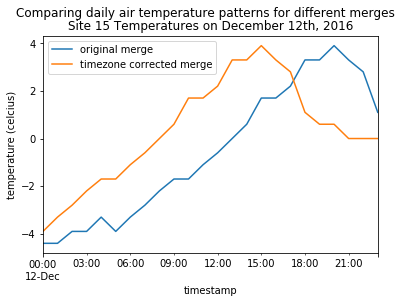

In [26]:
# plot to compare merges 
fig = plt.figure()
plt.title('Site 15 Temperatures on December 12th, 2016')
fig.suptitle('Comparing daily air temperature patterns for different merges')
plt.ylabel('temperature (celcius)')

train_pivot.loc[date,15].plot(label = 'original merge')
train_etz_pivot.loc[date,15].plot(label = 'timezone corrected merge')
plt.legend()

In [27]:
# save figure 
fig.savefig('compare_merges.jpg',bbox_inches = 'tight')

##### Sites 9/13, US/Central

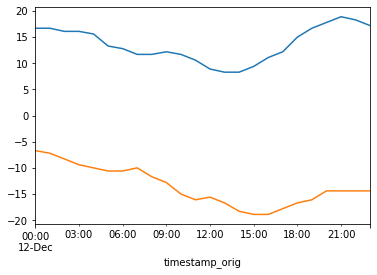

In [29]:
# plot
train_pivot.loc[date,9].plot()
train_pivot.loc[date,13].plot()

##### Sites 2/10, US/Mountain

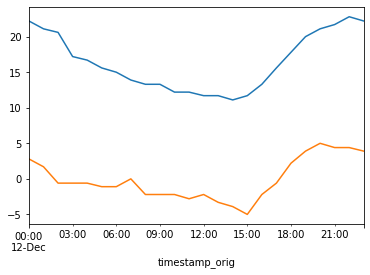

In [30]:
# plot
train_pivot.loc[date,2].plot()
train_pivot.loc[date,10].plot()

##### Site 7/11, Canada/Eastern

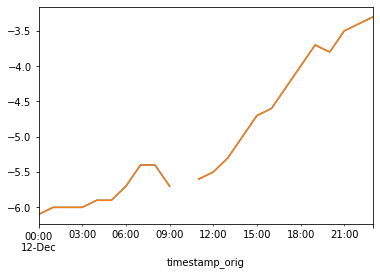

In [31]:
# plot
train_pivot.loc[date,7].plot()
train_pivot.loc[date,11].plot()

These are generally what we would expect -- the sites in the same timezones have a similar weather pattern, with differences in temperature
When timezone corrected, the rise/fall of temperature follows a much more typical curve -- so it appears that timezone correction did align the weather & meter data timestamps
One thing to note is that sites 7 & 11 in Canada/Eastern have the same air temperature -- because they are probably in the same city (Montreal/Ottawa, Canada)!

## Conclusion

**It appears that the timezone correction improved the merge between the weather and meter data, at least for the electric meter reading. We recommend using this version of the data for analysis.**